## Data Analysis Mathematics, Algorithms and Modeling

# AI Powered Recipe Recommendation System 

### Team : Group 3
| Student No  | First Name                  | Last Name     |
|-------------|-----------------------------|---------------|
| 9041129     | Nidhi                       | Ahir          |
| 9016986     | Keerthi                     | Gonuguntla    |
| 9027375     | Khushbu                     | Lad           |

#### Introduction

The relationship between a recipe number of ingredients (n_ingredients) and steps (n_steps) is examined in this analysis. We evaluate if recipes with additional ingredients need more steps using linear regression. In order to determine how well the data fits the model, the study focuses on assessing the model's reliability using Homoscedasticity and R-squared measurements.

### Dataset & Programming Requirements

##### Ractangular Dataset : files
1. Raw_recepes.csv
2. Raw_interaction.csv

##### Import Libraries

In [5]:
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import boxcox
import scipy.stats as zscore
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.metrics import r2_score

##### RawRecipe : Dataset in classes and methods

In [6]:
class RawRecipe:
    def __init__(self):
        self.file_path = './Dataset/RAW_recipes.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_recipes.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data

##### RAW_interactions : Dataset in classes and methods

In [7]:
class RecepeInteraction:
    def __init__(self):
        self.file_path = './Dataset/RAW_interactions.csv'
        self.data = None
    
    # Loads the data from a CSV file.
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
        print(f"---> STEP 1 : Loads the data from a CSV file. \r\n")
        print(f"RAW_interactions.csv : Data loaded successfully.")
        print(f"Total Records : {self.data.shape[0]} \r\n")
        return self.data
    
    def view_sample_data(self):
        self.data.head(5)

    # Data quality : Null Check
    def check_null_values(self):
        print(f"---> STEP 2 : Null Check for data \r\n")
        if self.data is not None:
            nulls = self.data.isnull().sum()
            print(nulls)
            return nulls
        else:
            print("Data not loaded.")
     # Data quality : Duplicate Check
    def check_duplicate_values(self):
        print(f"\r\n---> STEP 3 : Duplicate data Check for recepe \r\n")
        if self.data is not None:
            counts = self.data["recipe_id"].value_counts()
            dupl = (counts[counts>1]).reset_index()
            dupl.columns = ["recipe_id", "Count"]
            print(dupl)
            return dupl
        else:
            print("Data not loaded.")

#### The main function : Initialise class objects & load data

In [8]:
if __name__ == "__main__":

    # Create an instance of the RecepeInteraction  class and load data
    interactionData = RecepeInteraction()
    interactionData.load_data()

    # Create an instance of the RecepeInteraction  class and load data
    recepeData = RawRecipe()
    recepeData.load_data()

---> STEP 1 : Loads the data from a CSV file. 

RAW_interactions.csv : Data loaded successfully.
Total Records : 1132367 

---> STEP 1 : Loads the data from a CSV file. 

RAW_recipes.csv : Data loaded successfully.
Total Records : 231637 



#### Merge dataset based on recipe Id

In [9]:
# Merge data using common field recepe Id
merged_data = pd.merge(recepeData.data, interactionData.data, left_on='id', right_on='recipe_id')
print("Data Merged Successfully")
merged_data.head(2)

Data Merged Successfully


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...


##### Create categorical values in dataset in order to apply exploration methods 

In [10]:

merged_data['category'] = merged_data['tags'].apply(lambda x: 'Quick Meal' if 'quick' in x.lower() else 'Other')

def categorize_minutes(minutes):
    if minutes <= 30:
        return "Quick"
    elif minutes <= 60:
        return "Moderate"
    else:
        return "Lengthy"

merged_data['difficulty_level'] = merged_data['minutes'].apply(categorize_minutes)

def categorize_rating(rating):
    if rating >= 4.5:
        return "Highly Rated"
    elif rating >= 3.0:
        return "Moderately Rated"
    else:
        return "Low Rated"

merged_data['User_Liking'] = merged_data['rating'].apply(categorize_rating)

# Value counts for 'category'
category_counts = merged_data['category'].value_counts()
print("Category Counts---------------------")
print(category_counts)

# Value counts for 'difficulty_level'
difficulty_level_counts = merged_data['difficulty_level'].value_counts()
print("\nDifficulty Level Counts---------------------")
print(difficulty_level_counts)

# Value counts for 'User_Liking'
user_liking_counts = merged_data['User_Liking'].value_counts()
print("\nUser Liking Counts---------------------")
print(user_liking_counts)

Category Counts---------------------
category
Other         1093891
Quick Meal      38476
Name: count, dtype: int64

Difficulty Level Counts---------------------
difficulty_level
Quick       466907
Moderate    343488
Lengthy     321972
Name: count, dtype: int64

User Liking Counts---------------------
User_Liking
Highly Rated        816364
Moderately Rated    228215
Low Rated            87788
Name: count, dtype: int64


### Additional exploration and validation

#### Converting factor variables to numeric

We can use label encoding or one code encoding in order to apply statistical operations like linear regression. 

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
merged_data['category_num'] = label_encoder.fit_transform(merged_data['category'])
merged_data['difficulty_level_num'] = label_encoder.fit_transform(merged_data['difficulty_level'])
merged_data['User_Liking_num'] = label_encoder.fit_transform(merged_data['User_Liking'])
merged_data[['id','category', 'category_num', 'difficulty_level', 'difficulty_level_num', 'User_Liking', 'User_Liking_num']].head(10)


,id,category,category_num,difficulty_level,difficulty_level_num,User_Liking,User_Liking_num
0,137739,Other,0,Moderate,1,Highly Rated,0
1,137739,Other,0,Moderate,1,Highly Rated,0
2,137739,Other,0,Moderate,1,Highly Rated,0
3,31490,Other,0,Quick,2,Low Rated,1
4,31490,Other,0,Quick,2,Highly Rated,0
5,31490,Other,0,Quick,2,Moderately Rated,2
6,31490,Other,0,Quick,2,Highly Rated,0
7,112140,Other,0,Lengthy,0,Moderately Rated,2
8,59389,Other,0,Moderate,1,Moderately Rated,2
9,59389,Other,0,Moderate,1,Highly Rated,0


#### Converting calendar dates to Julian

In [12]:
def to_julian(date):
    return date.to_julian_date() 

merged_data['date'] =  pd.to_datetime(merged_data['date'])
merged_data['Julian_Date'] = merged_data['date'].apply(to_julian)
merged_data[['id','date', 'Julian_Date']].head(10)


,id,date,Julian_Date
0,137739,2006-02-18,2453784.5
1,137739,2010-08-21,2455429.5
2,137739,2011-12-05,2455900.5
3,31490,2002-08-19,2452505.5
4,31490,2006-08-27,2453974.5
5,31490,2009-07-18,2455030.5
6,31490,2011-04-10,2455661.5
7,112140,2005-10-27,2453670.5
8,59389,2008-06-11,2454628.5
9,59389,2009-04-15,2454936.5


#### Converting categorical values to dummies

This process converts categorical values into boolean values, these columns are known as ***dummy variables*** or ***indicator variables***.

In [13]:
dummies = pd.get_dummies(merged_data['difficulty_level'], prefix='difficulty_level', drop_first=True)
merged_data = pd.concat([merged_data, dummies], axis=1)
merged_data[['id','difficulty_level', 'difficulty_level_Moderate','difficulty_level_Quick']].head(10)


,id,difficulty_level,difficulty_level_Moderate,difficulty_level_Quick
0,137739,Moderate,True,False
1,137739,Moderate,True,False
2,137739,Moderate,True,False
3,31490,Quick,False,True
4,31490,Quick,False,True
5,31490,Quick,False,True
6,31490,Quick,False,True
7,112140,Lengthy,False,False
8,59389,Moderate,True,False
9,59389,Moderate,True,False


#### Performing Box-Cox transformations

Box-Cox Lambda: 0.4021
SLR R-squared after Box-Cox: 0.1375
SLR Mean Squared Error after Box-Cox: 29.3023


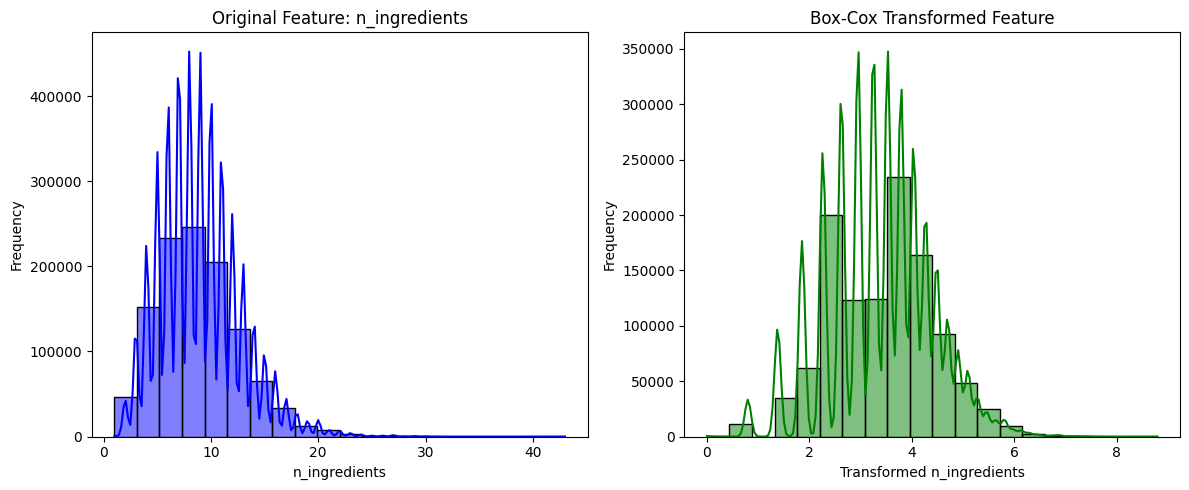

In [14]:
from scipy.stats import boxcox

# Ensure the feature 'n_ingredients' has all positive values (shift if necessary)
if (merged_data['n_ingredients'] <= 0).any():
    min_value = merged_data['n_ingredients'].min()
    shift_value = abs(min_value) + 1
    transformed_feature = merged_data['n_ingredients'] + shift_value
else:
    transformed_feature = merged_data['n_ingredients']

# Apply Box-Cox transformation
transformed_feature, lambda_value = boxcox(transformed_feature)

# Refit SLR using the Box-Cox transformed feature
X_slr = transformed_feature.reshape(-1, 1)
y_slr = merged_data['n_steps']

# Split the data
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

# Train the model
model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train_slr)

# Make predictions
y_pred_slr = model_slr.predict(X_test_slr)

# Calculate metrics
r2_slr = r2_score(y_test_slr, y_pred_slr)
mse_slr = mean_squared_error(y_test_slr, y_pred_slr)

# Print results
print(f"Box-Cox Lambda: {lambda_value:.4f}")
print(f"SLR R-squared after Box-Cox: {r2_slr:.4f}")
print(f"SLR Mean Squared Error after Box-Cox: {mse_slr:.4f}")


# Plot the original feature and Box-Cox transformed feature
plt.figure(figsize=(12, 5))

# Original feature
plt.subplot(1, 2, 1)
sns.histplot(merged_data['n_ingredients'], kde=True, color='blue', bins=20)
plt.title('Original Feature: n_ingredients')
plt.xlabel('n_ingredients')
plt.ylabel('Frequency')

# Box-Cox transformed feature
plt.subplot(1, 2, 2)
sns.histplot(transformed_feature, kde=True, color='green', bins=20)
plt.title('Box-Cox Transformed Feature')
plt.xlabel('Transformed n_ingredients')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The Box-Cox transformation with a lambda of 0.4021 slightly improved the model's performance, with an R-squared of 0.1375 and MSE of 29.3023. These results are comparable to the original model and boxcox transformations, indicating that the transformation did not drastically improve model fit. The feature’s distribution became more normalized.

#### Tukey's Ladder

In [17]:

# Apply Tukey's Ladder of Powers transformations to 'n_ingredients'
transformed_X = {
    'Square Root': np.sqrt(merged_data['n_ingredients']),
    'Log': np.log1p(merged_data['n_ingredients']),  # log1p handles zeroes by applying log(1+x)
    'Reciprocal': 1 / (merged_data['n_ingredients'] + 1),  # Avoid division by zero
    'Square': np.square(merged_data['n_ingredients'])
}

# Initialize a dictionary to store results
results = {}

# Loop through transformations and apply SLR
for transform_name, X_transformed in transformed_X.items():
    X_slr = X_transformed.values.reshape(-1, 1)
    y_slr = merged_data['n_steps']
    
    # Split the data
    X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)
    
    # Train the model
    model_slr = LinearRegression()
    model_slr.fit(X_train_slr, y_train_slr)
    
    # Make predictions
    y_pred_slr = model_slr.predict(X_test_slr)
    
    # Calculate metrics
    r2_slr = r2_score(y_test_slr, y_pred_slr)
    mse_slr = mean_squared_error(y_test_slr, y_pred_slr)
    
    # Store results
    results[transform_name] = {'R-squared': r2_slr, 'MSE': mse_slr}

# Print results
for transform, metrics in results.items():
    print(f"{transform} Transformation:")
    print(f"  R-squared: {metrics['R-squared']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")


Square Root Transformation:
  R-squared: 0.1393
  MSE: 29.2414
Log Transformation:
  R-squared: 0.1312
  MSE: 29.5182
Reciprocal Transformation:
  R-squared: 0.1021
  MSE: 30.5061
Square Transformation:
  R-squared: 0.1367
  MSE: 29.3296


Applying Tukey's Ladder showed minimal improvement. The Square Root Transformation had the best R-squared (0.1393) and MSE (29.2414) but was slightly worse than the original model (R-squared: 0.1446, MSE: 29.0607). Log, Reciprocal, and Square transformations underperformed, indicating weak linearity between 'n_ingredients' and 'n_steps'. Additional predictors may help.

#### Simple Linear Regression (SLR)

In [18]:

# Define independent and dependent variables for SLR
X_slr = merged_data[['n_ingredients']]  # Ensure X_slr is 2D by using double brackets
y_slr = merged_data['n_steps']          # Target variable remains 1D

# Split the data
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X_slr, y_slr, test_size=0.2, random_state=42)

# Train the model
model_slr = LinearRegression()
model_slr.fit(X_train_slr, y_train_slr)

# Make predictions
y_pred_slr = model_slr.predict(X_test_slr)

# Calculate metrics
r2_slr = r2_score(y_test_slr, y_pred_slr)
mse_slr = mean_squared_error(y_test_slr, y_pred_slr)

# Print results
print(f"SLR R-squared: {r2_slr:.4f}")
print(f"SLR Mean Squared Error: {mse_slr:.4f}")


SLR R-squared: 0.1446
SLR Mean Squared Error: 29.0607


The SLR R-squared value of 0.1446 indicates that about 14.46% of the variability in 'n_steps' is explained by 'n_ingredients'. The Mean Squared Error (MSE) of 29.0607 moderate errors in the predictions. The low R-squared implies that other factors probably influence 'n_steps' beyond 'n_ingredients'.

#### Multiple Linear Regression (MLR)

In [19]:
# Define independent and dependent variables for MLR
X_mlr = merged_data[['minutes', 'n_ingredients', 'n_steps']]  # Replace with actual feature column names
y_mlr = merged_data['rating']                                 # Replace 'target' with your actual target variable

# Split the data
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

# Train the model
model_mlr = LinearRegression()
model_mlr.fit(X_train_mlr, y_train_mlr)

# Make predictions
y_pred_mlr = model_mlr.predict(X_test_mlr)

# Calculate metrics
r2_mlr = r2_score(y_test_mlr, y_pred_mlr)
mse_mlr = mean_squared_error(y_test_mlr, y_pred_mlr)

# Print results
print(f"MLR R-squared: {r2_mlr:.4f}")
print(f"MLR Mean Squared Error: {mse_mlr:.4f}")


MLR R-squared: 0.0004
MLR Mean Squared Error: 1.5961


The SLR R-squared value of 0.1446 indicates that approximately 14.46% of the variability in 'n_steps' is explained by 'n_ingredients'. The Mean Squared Error (MSE) of 29.0607 suggests moderate error in predictions. The low R-squared implies that other factors likely influence 'n_step'` beyond 'n_ingredients'.

### Workshop 4

#### Summary
In order to determine whether recipes with more ingredients necessitate noticeably more steps, this study looks at the relationship between the number of ingredients (n_ingredients) and the number of steps (n_steps) in recipes. The new hypothesis states that "There is a positive correlation between n_ingredients and n_steps, such that recipes with more ingredients involve more preparation steps." This link is assessed using linear regression, which tests the model's performance (such as the R-squared measure) and assumptions (such as homoscedasticity). Preliminary findings point to a quantifiable correlation, which aids in improving predictions of recipe complexity. This information helps recipe platforms improve user experience and optimize recipe design.

#### Simple Linear Regression

Here we selected the n_ingredients as the independent variable and n_steps as the dependent variable and we are identifying the relation ship between both.

Coefficient (Slope): 0.5991637772038425
Intercept: 4.262956265316627


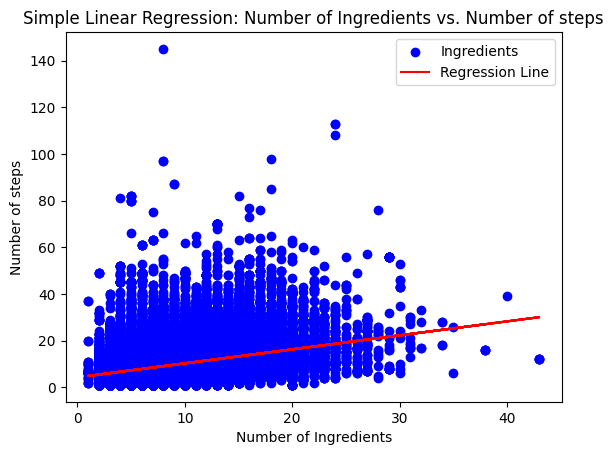

In [15]:
# Extracting relevant columns for regression
data = merged_data[['n_ingredients', 'n_steps']].dropna()  # Ensure no missing values
X = data[['n_ingredients']]  # Independent variable
y = data['n_steps']     # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Print model coefficients
print("Coefficient (Slope):", linear_model.coef_[0])
print("Intercept:", linear_model.intercept_)

# Predict on test data
y_pred = linear_model.predict(X_test)

# Scatter plot of actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Ingredients')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of steps')
plt.title('Simple Linear Regression: Number of Ingredients vs. Number of steps')
plt.legend()
plt.show()

#### Analyses 

* Homoscedasticity

* R-Squared Measure

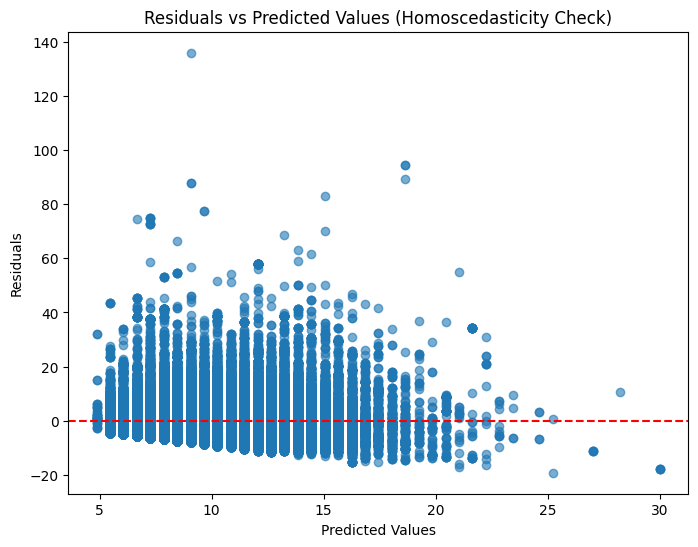

R-Squared Value: 0.14464629023259945
                            OLS Regression Results                            
Dep. Variable:                n_steps   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                 1.532e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:22:22   Log-Likelihood:            -2.8098e+06
No. Observations:              905893   AIC:                         5.620e+06
Df Residuals:                  905891   BIC:                         5.620e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

In [16]:
# Ensure numeric data and handle missing values
merged_data['n_ingredients'] = pd.to_numeric(merged_data['n_ingredients'], errors='coerce')
merged_data['n_steps'] = pd.to_numeric(merged_data['n_steps'], errors='coerce')
merged_data = merged_data.dropna(subset=['n_ingredients', 'n_steps'])

# Define features (X) and target variable (y)
X = merged_data[['n_ingredients']].copy()
y = merged_data['n_steps']

# Add a constant for the intercept term
X = sm.add_constant(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = sm.OLS(y_train, X_train).fit()

# Predict on the test data
y_pred = model.predict(X_test)

# Residuals
residuals = y_test - y_pred

# Plot residuals vs predicted values for Homoscedasticity
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values (Homoscedasticity Check)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# R-squared value
r_squared = r2_score(y_test, y_pred)
print(f"R-Squared Value: {r_squared}")

# Summary of the linear regression model
print(model.summary())
